In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
from collections import Counter

In [2]:
df=pd.read_csv(r"train.csv")

In [3]:
df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [4]:
to_drop=["id","homepage","imdb_id","poster_path"]
df.drop(to_drop,axis=1,inplace=True)

In [5]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
#Now there are two columns for titles.original_title column represnt the title of the movie in its original language format while title column consists of name of the movies that has been translated to english. So there is no use of keeping original_title column.
df.drop("original_title",axis=1,inplace=True)

In [7]:
df.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
original_language        3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                     2987 non-null object
crew                     2984 non-null object
revenue                  3000 non-null int64
dtypes: float64(2), int64(2), object(14)
memory usage: 422.0+ KB


The dataset is quite messy. While going through the datset it can be seen that many columns has dictionary inside a list and that list is in form of string. Every columns need to be processed seperately because the keys and value present are different in each column.

Belongs to collection column

In [9]:
#filling the null value with none i.e. it will represent that there is no prequel of the current movie.
df.belongs_to_collection.fillna("None", inplace=True)

In [10]:
#The values in the cell are in string format but consists of a list in it. In that list there is again a dictionary.
#So first task is to take out th list from the string

for i in range(0,len(df)):
    df["belongs_to_collection"][i]=eval(df["belongs_to_collection"][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
#In the list we have only one dictionary in which the prequel or the collection is the given with the key of "name".
#So we need to extract the value associated with that key.

for i in range(0,len(df)):
    if df["belongs_to_collection"][i]== None:
        pass
    else:
        df["belongs_to_collection"][i]=df["belongs_to_collection"][i][0]["name"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#Again the movies which do not have any prequel has taken null value which need to be filled with None.
df.belongs_to_collection.fillna("None",inplace=True)

Genres column

A movie can be part of a single collections of movie but it can have multiple genre. Genre column has the same of the nested multiple variable but the only issue is it have multiple dictionary inside the list but it has the same key of "name".

In [13]:
#Genre column has 7 null values. So lets see what are the movies and can we input the genre based on our knowledge.

df[df.genres.isnull()]["title"].reset_index()

,index,title
0,470,"The Book of Mormon Movie, Volume 1: The Journey"
1,1622,Jackpot
2,1814,"Ryaba, My Chicken"
3,1819,Sky. Plane. Girl.
4,2423,Amarkalam
5,2686,Lift
6,2900,Rita's Last Fairy Tale


In [14]:
#Seems strange name but we can give it a try by checking which genres these movies belongs to.
#For now we will fill in these values with a string file of "other" but can processes it later while developing more insights.

df.genres.fillna("None",inplace=True)

In [15]:
#So first task is to take out th list from the string

for i in range(0,len(df)):
    df["genres"][i]=eval(df["genres"][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
#Filling the empty values with "Other Genres"
df.genres.fillna("Other",inplace=True)

In [17]:
#Creating a list of categories of genre the movie belongs to
for i in range(0,len(df)):
    if df["genres"][i]=="Other":
        pass
    else:
        a=[]
        for j in range(0,len(df["genres"][i])):
            a.append(df["genres"][i][j]["name"])
        df["genres"][i]=a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
#Dealing the genre which we mentioned "Other".
df[df.genres=="Other"]["title"]

#Looking for the genres that the movie beloged.

470     The Book of Mormon Movie, Volume 1: The Journey
1622                                            Jackpot
1814                                  Ryaba, My Chicken
1819                                  Sky. Plane. Girl.
2423                                          Amarkalam
2686                                               Lift
2900                             Rita's Last Fairy Tale
Name: title, dtype: object

In [19]:
df.at[470,"genres"]=["Adventure","Drama"]
df.at[1622,"genres"]=["Thriller","Comedy"]
df.at[1814,"genres"]=["Comedy"]
df.at[1819,"genres"]=["Drama","Romance"]
df.at[2423,"genres"]=["Action","Drama","Romance"]
df.at[2686,"genres"]=["Comedy","Drama"]
df.at[2900,"genres"]=["Fanatsy","Mystery","Drama"]

In [20]:
df["number_genre"]=len(df["genres"])

In [21]:
df.drop("number_genre",axis=1,inplace=True)

In [22]:
genres_list=[]
for i in range(0,len(df)):
    genres_list.extend(df.genres[i])

In [25]:
a=Counter(genres_list)
d={}
for key, value in a.items():
    d[key]=value
genre_df=pd.DataFrame(list(d.items()),columns=["Genre","Total"])

In [26]:
genre_df.sort_values("Total",ascending=False)

,Genre,Total
1,Drama,1536
0,Comedy,1031
4,Thriller,790
5,Action,742
3,Romance,573
11,Crime,469
7,Adventure,440
8,Horror,301
12,Science Fiction,290
2,Family,260


Production Companies column

In [27]:
#Similar process will be used. Except this time we will extract the name of 
#the production companies and the total number of production companies involved

#Filling null values
df.production_companies.fillna("None",inplace=True)

#Converting string into list

for i in range(0,len(df)):
    df["production_companies"][i]=eval(df["production_companies"][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [28]:
#Filling null values
df.production_companies.fillna("Unspecified",inplace=True)

In [29]:
#Creating a list of production companies of a certain movie
for i in range(0,len(df)):
    if df["production_companies"][i]=="Unspecified":
        pass
    else:
        a=[]
        for j in range(0,len(df["production_companies"][i])):
            a.append(df["production_companies"][i][j]["name"])
        df["production_companies"][i]=a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
#Checking out for top production companies
companies_list=[]
for i in range(0,len(df)):
    if df["production_companies"][i]=="Unspecified":
        pass
    else:
        companies_list.extend(df["production_companies"][i])

In [31]:
#Counting the number of movies a production companies has produced

from collections import Counter
a=Counter(companies_list)
d={}
for key, value in a.items():
    d[key]=value
production_companies_df = pd.DataFrame(list(d.items()),columns=["Production_Companies","Produced"])

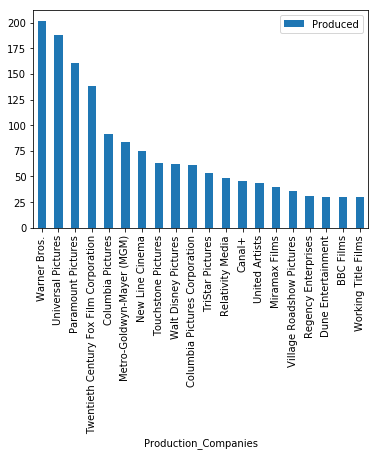

In [32]:
#Visualizing the number of movies produced by the production house.
production_companies_df.sort_values("Produced",ascending=False).set_index("Production_Companies").head(20).plot(kind="bar")

Production countries column

In [48]:
#Similar to production companies we will extract the countries name where shooting has been done

#Filling null values
df.production_countries.fillna("None",inplace=True)


#Converting string into list

for i in range(0,len(df)):
    df["production_countries"][i]=eval(df["production_countries"][i])

    
#Filling null values
df.production_countries.fillna("Unspecified",inplace=True)


#Creating a list of production countries of a certain movie
for i in range(0,len(df)):
    if df["production_countries"][i]=="Unspecified":
        pass
    else:
        a=[]
        for j in range(0,len(df["production_countries"][i])):
            a.append(df["production_countries"][i][j]["name"])
        df["production_companies"][i]=a

TypeError: eval() arg 1 must be a string, bytes or code object

In [38]:
countries_list=[]
for i in range(0,len(df)):
    if df["production_countries"][i]=="Unspecified":
        pass
    else:
        countries_list.extend(df["production_countries"][i])

In [47]:
df["production_countries"][1][0]["name"]

'United States of America'

In [35]:
#Counting the number of movies a production companies has produced

from collections import Counter
a=Counter(countries_list)
d={}
for key, value in a.items():
    d[key]=value
production_countries_df = pd.DataFrame(list(d.items()),columns=["Countries","Produced"])

TypeError: unhashable type: 'dict'

In [ ]:
#Visualizing the number of movies produced by the production house.
plt.figure(figsize=(10,8))
production_countries_df.sort_values("Produced",ascending=False).set_index("Countries").head(20).plot(kind="bar")

In [ ]:
#Since majority of movie has USA as their produced companies so we will fill the cell which we used to input "unspecified" 
#with USA.

for i in df[df.production_countries=="Unspecified"].index.tolist():
    df.at[i,"production_countries"]=['United States of America']

Cast column

There are 13 missing values for cast column. So we need to handle this missing values first.We can add the cast members name mannually. So we need first fill those field with "None" and then we will process the rest of the field just like we did for Production companies and countries

In [ ]:
df.cast.fillna("None",inplace=True)

In [ ]:
#Converting string to list
for i in range(0,len(df)):
    df["cast"][i]=eval(df["cast"][i])


Now if we see the above section of single cast member we whave multiple details. So not only name but multiple things can be derived from this. Unlike the above variables changing the original column can lead to loss of information. So we will start deriving new columns. For now we will only derive the name of the cast members and look back to the original column later for more insights.

In [ ]:
#Adding new columns for cast names
df["cast_name"]=""

In [ ]:
#Filling null values
df.cast.fillna("Unspecified",inplace=True)


#Creating a list of cast of a certain movie
for i in range(0,len(df)):
    if df["cast"][i]=="Unspecified":
        pass
    else:
        a=[]
        for j in range(0,len(df["cast"][i])):
            a.append(df["cast"][i][j]["name"])
        df.at[i,"cast_name"]=a

In [ ]:
#Creating a list of all the cast memebers

cast_name_list=[]
for i in range(0,len(df)):
    cast_name_list.extend(df["cast_name"][i])

In [ ]:
from collections import Counter
a=Counter(cast_name_list)
d={}
for key, value in a.items():
    d[key]=value
cast_name_df = pd.DataFrame(list(d.items()),columns=["Actors","Movies_done"])

In [ ]:
cast_name_df.sort_values("Movies_done",ascending=False).set_index("Actors").head(11).plot(kind="bar")

Crew column

After looking at the single file in crew column it can be seen that there are multiple jobs in a crew cell. So we will put our interest in extracting the name of directors and producers.

In [ ]:
#We'll start by making two new columns. First is director and second one will be producers
df["director"]=""
df["producer"]=""

In [ ]:
#As a practice which we have used in all the above columns well again fill the null value with "None".
df.crew.fillna("None",inplace=True)

In [ ]:
#string to list
#Converting string to list
for i in range(0,len(df)):
    df["crew"][i]=eval(df["crew"][i])

In [ ]:
#Filling null values
df.crew.fillna("Unspecified",inplace=True)

#Taking out name of director and producer of a certain movie
for i in range(0,len(df)):
    if df["crew"][i]=="Unspecified":
        pass
    else:
        for j in range(0,len(df["crew"][i])):
            if df["crew"][i][j]["job"]=="Director":
                df.at[i,"director"]=df["crew"][i][j]["name"]
            elif df["crew"][i][j]["job"]=="Producer":
                df.at[i,"producer"]=df["crew"][i][j]["name"]
            else:
                pass

So now the data is prosessed but still we got some inputs which we entered as unspecified. Let's see can we find those values.

A good method can be that while we are figuring out what needs to be replaced with what we can use feature engineering to derive new outcomes from data. Later we can check how much the new derived features will effect the target variable.

In [ ]:
df.columns

In [ ]:
df["prequel"]=np.where(df.belongs_to_collection !="None", "Yes", "No")

In [ ]:
df.budget.skew

In [ ]:
plt.hist(df["budget"]);

The dataset is quite skewed, so we will transform by taking log of budget so that skewness can be decreased.

In [ ]:
df["budget_revised"]=np.log1p(df["budget"])

In [ ]:
df.budget_revised.skew()

In [ ]:
plt.hist(df.budget_revised)

In [ ]:
plt.figure(figsize=(10,8))
df.original_language.value_counts().head(11).plot(kind="bar")

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForest